In [24]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import datetime as dt 
import plotly.offline as pyo 



In [25]:
ticker = 'RBLX'
df = pdr.DataReader(ticker, data_source='yahoo', start='2021-3-1')['Close'] #treat df contain all information
print(df)

Date
2021-03-10    69.500000
2021-03-11    73.900002
2021-03-12    69.699997
2021-03-15    72.150002
2021-03-16    77.000000
                ...    
2022-08-29    39.220001
2022-08-30    39.029999
2022-08-31    39.110001
2022-09-01    38.509998
2022-09-02    37.939999
Name: Close, Length: 376, dtype: float64


In [26]:
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly' 

In [27]:
df.plot()


In [28]:
daily_percent_change = df.pct_change() #df target information for close price. 
daily_percent_change.plot()


In [29]:

#Using Geometric Brownian Motion
u = daily_percent_change.mean()
standard_deviation = daily_percent_change.std()
variance = np.power(standard_deviation,2)
drift = u - (1/2 * variance)
z = norm.ppf(np.random.rand(50,1000)) # <--- just the randomness component.
print(z)


daily_returns = np.exp(drift + standard_deviation * z )
#print(daily_returns)

price_list = np.zeros_like(daily_returns)
#print(price_list) 


S0 = df.iloc[-1] 
#print(S0) # 37.93 this is our s sub 0. price. Stationary point we start. 
price_list[0] = S0 




[[-1.76047400e+00 -1.43609947e+00  1.52386180e+00 ...  2.76928748e-01
   2.08895666e-01 -2.72276023e-02]
 [ 8.72511311e-01  4.08890983e-01 -1.02985280e+00 ... -1.33027079e+00
   4.24649422e-01 -2.99563951e-01]
 [ 3.09397519e-01  9.27049749e-01  1.02579219e+00 ... -4.54499561e-01
   1.63303991e-01  3.13567964e-02]
 ...
 [ 1.01928382e+00 -1.07368646e+00 -1.38098222e+00 ...  2.49786338e-01
  -3.61705411e-01  4.78365158e-01]
 [-1.23675305e+00  6.68627481e-01  2.63899565e-01 ... -4.99709482e-04
   3.77450692e-01 -1.38772606e-01]
 [ 1.29835556e-01  1.85461395e+00  6.70629613e-01 ... -9.48594544e-01
  -2.92521305e-01  9.80372545e-01]]


In [30]:
for t in range(1,50):
    price_list[t] = price_list[t-1] * daily_returns[t]
    


Text(0.5, 0, 'Price after 50 days')

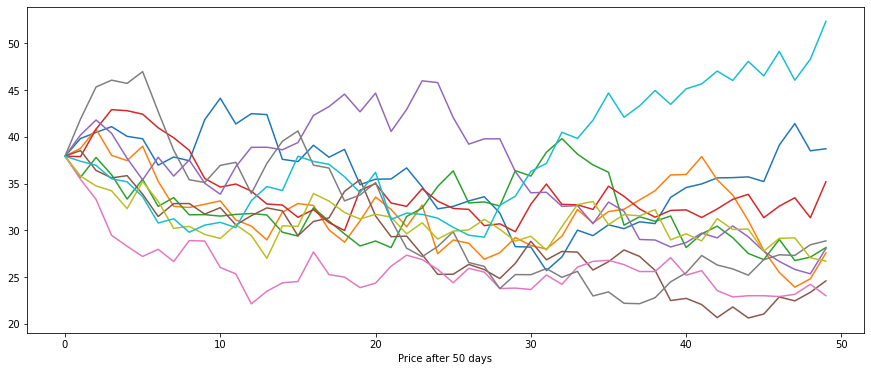

In [31]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])
plt.xlabel("Price after 50 days")